# TVAE Latent Space Visualization

This notebook demonstrates how to visualize and analyze the latent space of a Tabular Variational Autoencoder (TVAE) model. We'll use the RHC dataset and explore different visualization techniques to understand the structure of the learned latent space.

## Import Required Libraries

In [20]:
import os
import sys
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sdv.metadata import SingleTableMetadata
from sdv.metadata import Metadata


from tvae.tvae_wrapper import TVAESynthesizer
from tvae.visualization import (
    visualize_latent_space,
    compare_original_synthetic_latent,
    calculate_latent_statistics,
    plot_latent_dimensions
)

# Define paths - use absolute path based on current file location
current_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.dirname(current_dir)  # Go one level up to project root

output_dir = os.path.join('Images', 'latent_space')
os.makedirs(output_dir, exist_ok=True)

## Load Data and Trained Model

Now we'll load the RHC dataset and either load an existing trained TVAE model or train a new one if none exists.

In [21]:
data_path = os.path.join(project_root, 'data', 'rhc.csv')
metadata_path = os.path.join(project_root, 'data', 'metadata.json')
model_path = os.path.join(project_root, 'examples', 'test_model_tvae_ep1000_compress32.pkl')
synthetic_path = os.path.join(project_root, 'examples', 'synthetic_data_tvae_ep1000_compress32.csv')

# Load the data
data = pd.read_csv(data_path)

In [17]:
# Function to load a trained model
def load_model(model_path):
    """Load a trained TVAE model from disk."""
    with open(model_path, 'rb') as f:
        return pickle.load(f)

In [18]:
# Check if a trained model exists, otherwise train a new one
if os.path.exists(model_path):
    print(f"Loading existing model from {model_path}")
    tvae = load_model(model_path)
else:
    print("Training a new TVAE model...")
    # Load metadata
    try:
        metadata = Metadata.load(metadata_path)
        # Extract single table metadata for 'rhc' table
        metadata = metadata.tables['rhc']
    except:
        # If loading fails, create new metadata
        print("Creating new metadata...")
        metadata = SingleTableMetadata()
        metadata.detect_from_dataframe(data)
    
    # Initialize and train TVAE
    tvae = TVAESynthesizer(
        metadata=metadata,
        epochs=50,  # Using fewer epochs for demonstration
        embedding_dim=32,
        compress_dims=(64, 32),
        decompress_dims=(32, 64),
        verbose=True
    )
    tvae.fit(data)
    
    # Save the model
    with open(model_path, 'wb') as f:
        pickle.dump(tvae, f)

Loading existing model from /home/mfacotti/martin/tVAE_Synth/examples/test_model_tvae_ep1000_compress32.pkl


## Generate and Save Synthetic Data

Let's generate synthetic data using our trained model or load existing synthetic data if available.

In [19]:
# Load synthetic data if it exists or generate new data
if os.path.exists(synthetic_path):
    print(f"Loading existing synthetic data from {synthetic_path}")
    synthetic_data = pd.read_csv(synthetic_path)
else:
    print("Generating synthetic data...")
    synthetic_data = tvae.sample(len(data))
    synthetic_data.to_csv(synthetic_path, index=False)

# Display first few rows of synthetic data
synthetic_data.head()

Loading existing synthetic data from /home/mfacotti/martin/tVAE_Synth/examples/synthetic_data_tvae_ep1000_compress32.csv


,cat1,cat2,ca,sadmdte,dschdte,dthdte,lstctdte,death,cardiohx,chfhx,...,meta,hema,seps,trauma,ortho,adld3p,urin1,race,income,ptid
0,MOSF w/Sepsis,NaN,No,11263,11484.0,NaN,11209,No,0,0,...,No,No,No,No,No,NaN,NaN,white,$25-$50k,14290687
1,MOSF w/Sepsis,NaN,No,12059,12230.0,12073.0,12327,Yes,0,0,...,No,No,No,No,No,NaN,NaN,white,Under $11k,8381629
2,ARF,NaN,No,11840,11775.0,NaN,11374,Yes,0,0,...,No,No,No,No,No,NaN,NaN,white,$11-$25k,15957922
3,ARF,NaN,Yes,10827,10758.0,NaN,11165,Yes,0,0,...,No,No,No,No,No,NaN,NaN,white,Under $11k,15405758
4,ARF,NaN,Yes,11974,11742.0,12122.0,12319,Yes,0,0,...,No,No,No,No,No,NaN,NaN,white,Under $11k,15166862


## Visualize Latent Space

Now we'll visualize the latent space of our TVAE model, coloring the points by various attributes to understand the structure of the learned representations.

Visualizing latent space...
Extracting latent embeddings...


100%|██████████| 58/58 [00:00<00:00, 300.83it/s]
/home/mfacotti/martin/tVAE_Synth/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/mfacotti/martin/tVAE_Synth/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Applying UMAP to reduce dimensionality to 2...


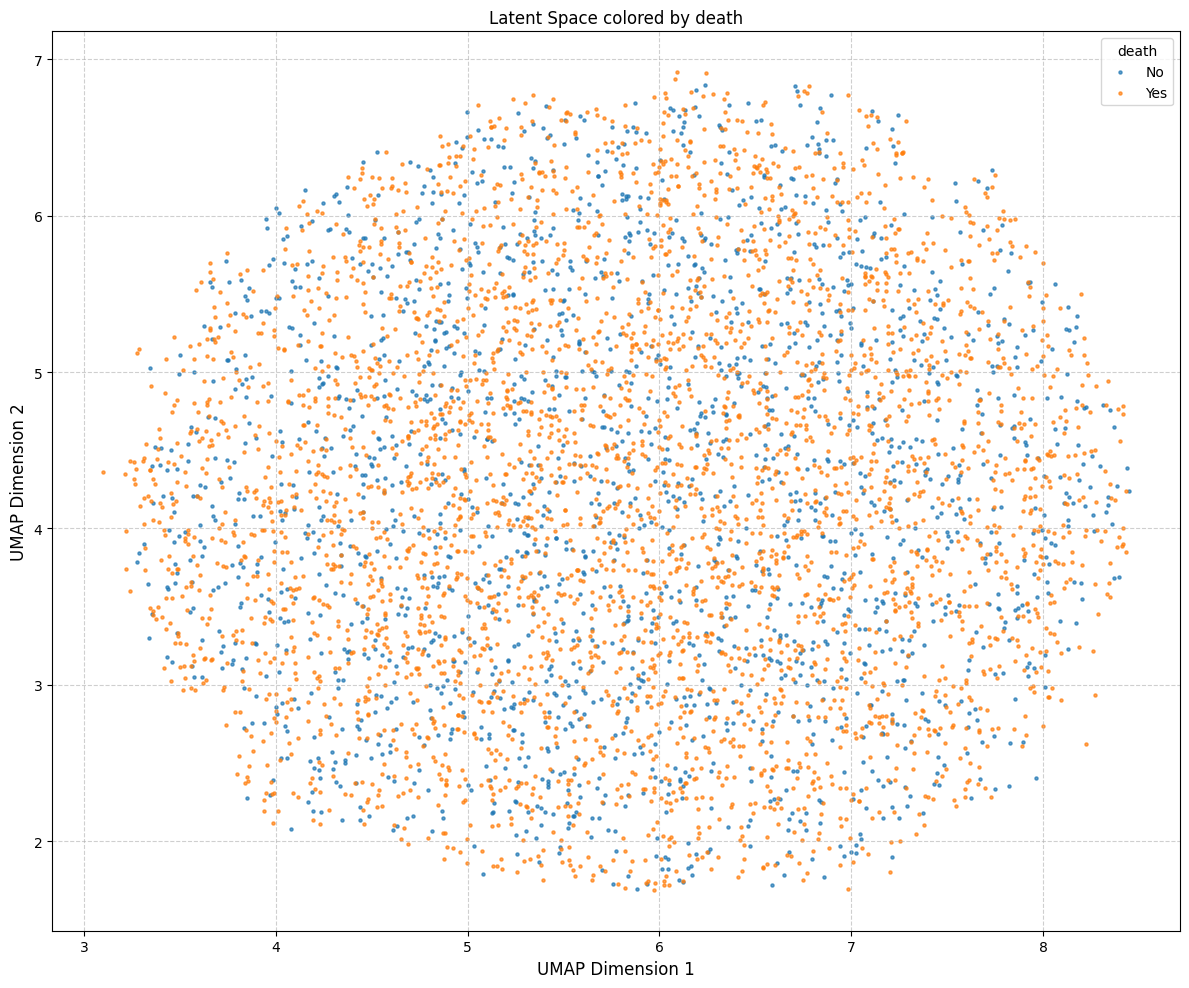

Extracting latent embeddings...


100%|██████████| 58/58 [00:00<00:00, 121.26it/s]
/home/mfacotti/martin/tVAE_Synth/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/mfacotti/martin/tVAE_Synth/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Applying UMAP to reduce dimensionality to 2...


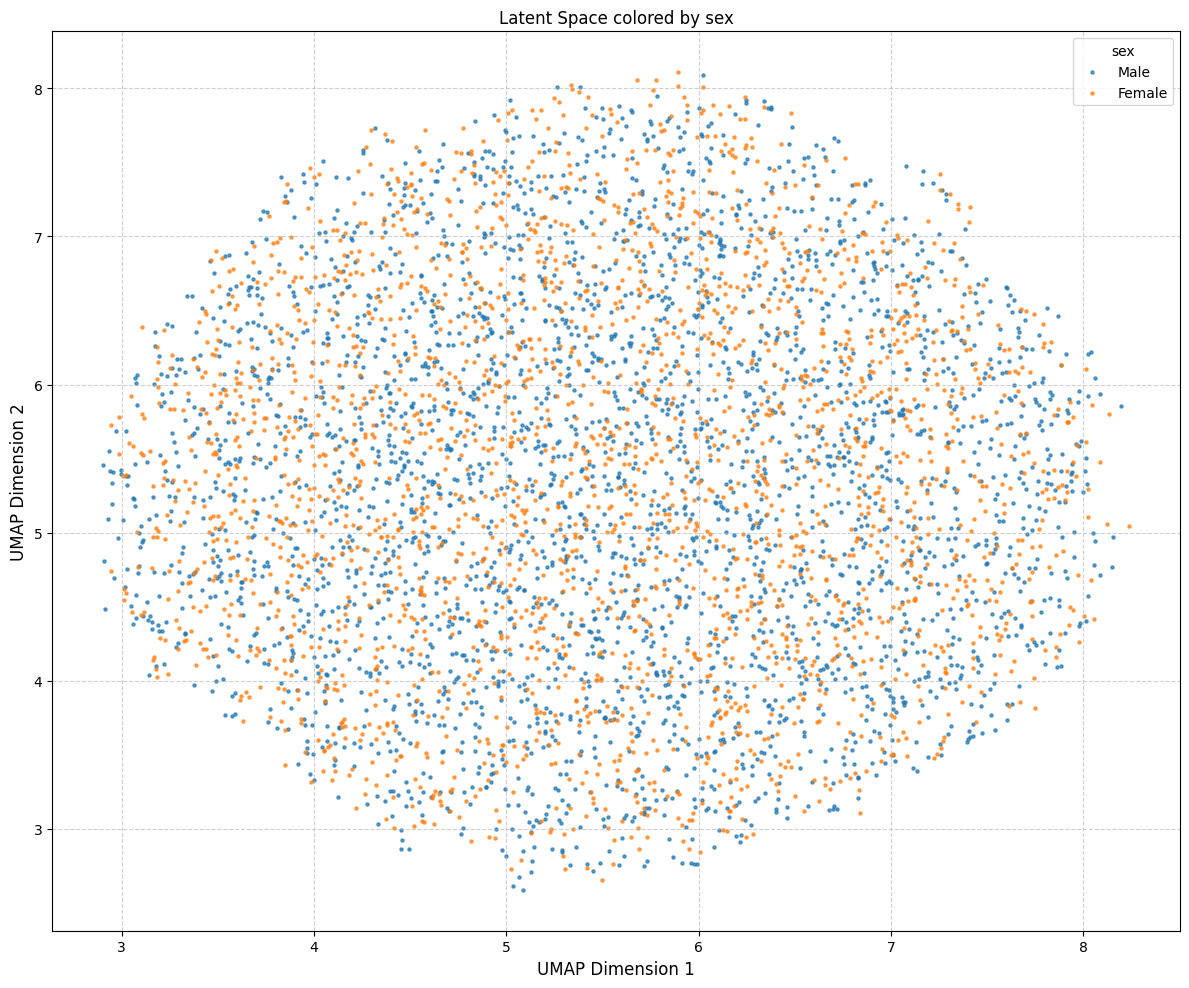

Extracting latent embeddings...


100%|██████████| 58/58 [00:00<00:00, 158.20it/s]
/home/mfacotti/martin/tVAE_Synth/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/mfacotti/martin/tVAE_Synth/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Applying UMAP to reduce dimensionality to 2...


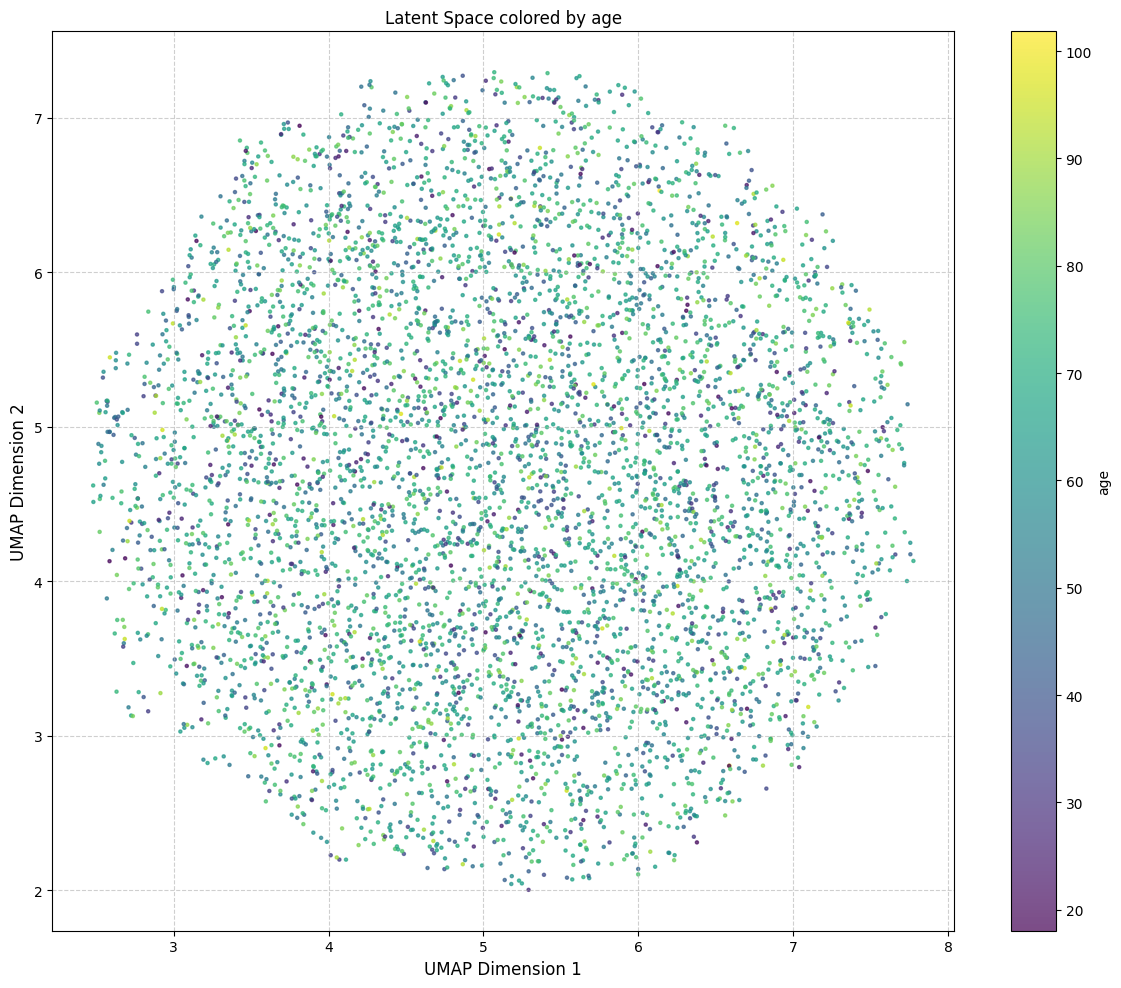

In [22]:
# List of columns we want to color by
color_columns = ['death', 'sex', 'age']

# Initialize a dictionary to store results
visualization_results = {}

# Visualize latent space colored by different attributes
print("Visualizing latent space...")

for color_column in color_columns:
    if color_column in data.columns:
        save_path = os.path.join(output_dir, f'latent_space_{color_column}.png')
        fig, latent_emb, umap_emb = visualize_latent_space(
            tvae_synthesizer=tvae,
            data=data,
            color_by=color_column,
            save_path=save_path
        )
        
        # Store results for later use
        visualization_results[color_column] = {
            'fig': fig,
            'latent_emb': latent_emb,
            'umap_emb': umap_emb
        }
        
        # Display the figure
        plt.figure(fig.number)
        plt.title(f'Latent Space colored by {color_column}')
        plt.show()

## Compare Original and Synthetic Data

Let's compare the original data and synthetic data in the latent space to see how well our model captures the data distribution.

Comparing original and synthetic data in latent space...
Extracting latent embeddings...


100%|██████████| 115/115 [00:00<00:00, 141.37it/s]
/home/mfacotti/martin/tVAE_Synth/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/home/mfacotti/martin/tVAE_Synth/venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Applying UMAP to reduce dimensionality to 2...


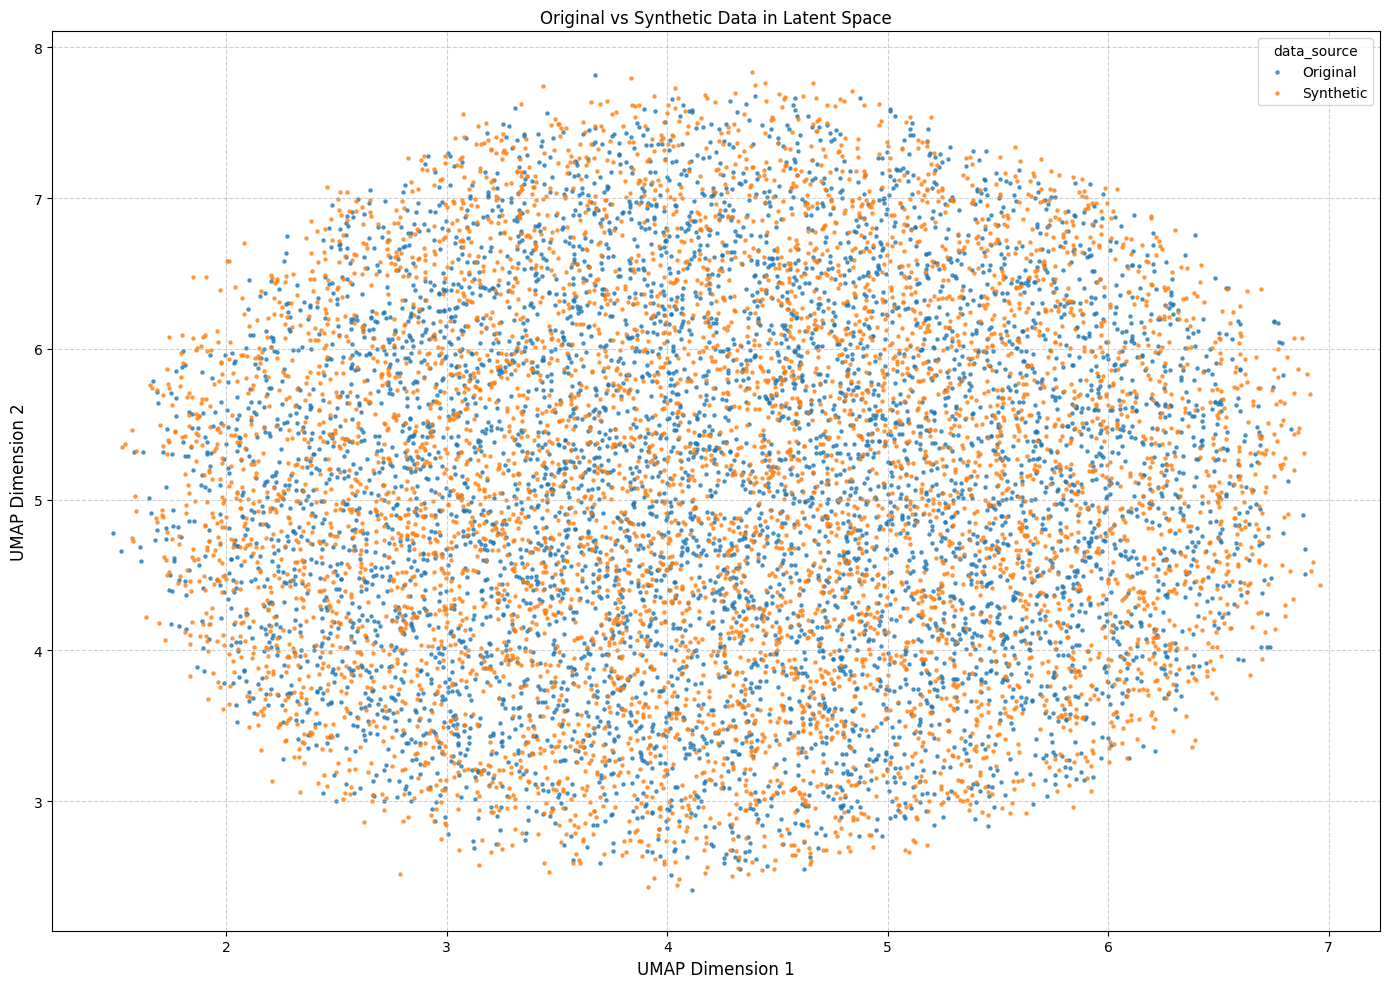

In [9]:
# Compare original and synthetic data in latent space
print("Comparing original and synthetic data in latent space...")
compare_path = os.path.join(output_dir, 'compare_original_synthetic.png')
compare_fig, compare_latent, compare_umap = compare_original_synthetic_latent(
    tvae_synthesizer=tvae,
    original_data=data,
    synthetic_data=synthetic_data,
    save_path=compare_path
)

# Display the comparison figure
plt.figure(compare_fig.number)
plt.title('Original vs Synthetic Data in Latent Space')
plt.show()

## Analyze Latent Dimensions

Now we'll calculate statistics of the latent dimensions and visualize the distributions of these dimensions to better understand the learned representations.

In [10]:
# Calculate statistics of the latent dimensions
print("Calculating latent space statistics...")
latent_stats = calculate_latent_statistics(compare_latent['original'])
print("Statistics of latent dimensions:")
display(pd.DataFrame(latent_stats))

Calculating latent space statistics...
Statistics of latent dimensions:


,Dimension,Mean,Std,Min,Max,Median,Skewness,Kurtosis
0,0,0.078804,1.024613,-3.579293,3.762628,0.083670,0.002133,0.030702
1,1,0.037765,1.078968,-3.930701,3.799845,0.035497,0.036273,-0.148703
2,2,0.046688,1.050245,-3.286725,4.745685,0.036404,0.078211,0.030552
3,3,-0.059127,1.039667,-4.147982,3.558177,-0.047795,-0.045815,0.009092
4,4,-0.113975,0.998923,-3.706605,3.998010,-0.115609,0.021089,0.031827
5,5,0.135301,0.980021,-3.785249,3.968508,0.158113,-0.060622,0.055838
6,6,-0.095483,1.009248,-3.874777,3.255921,-0.096736,0.003900,-0.031513
7,7,0.091245,1.063553,-4.397385,3.588981,0.084343,-0.068630,0.115127
8,8,-0.002310,1.094768,-3.765196,4.751346,-0.007029,0.035059,-0.027699
9,9,-0.165656,0.967723,-3.824487,2.915783,-0.163448,-0.011484,-0.070198


Plotting latent dimension distributions...


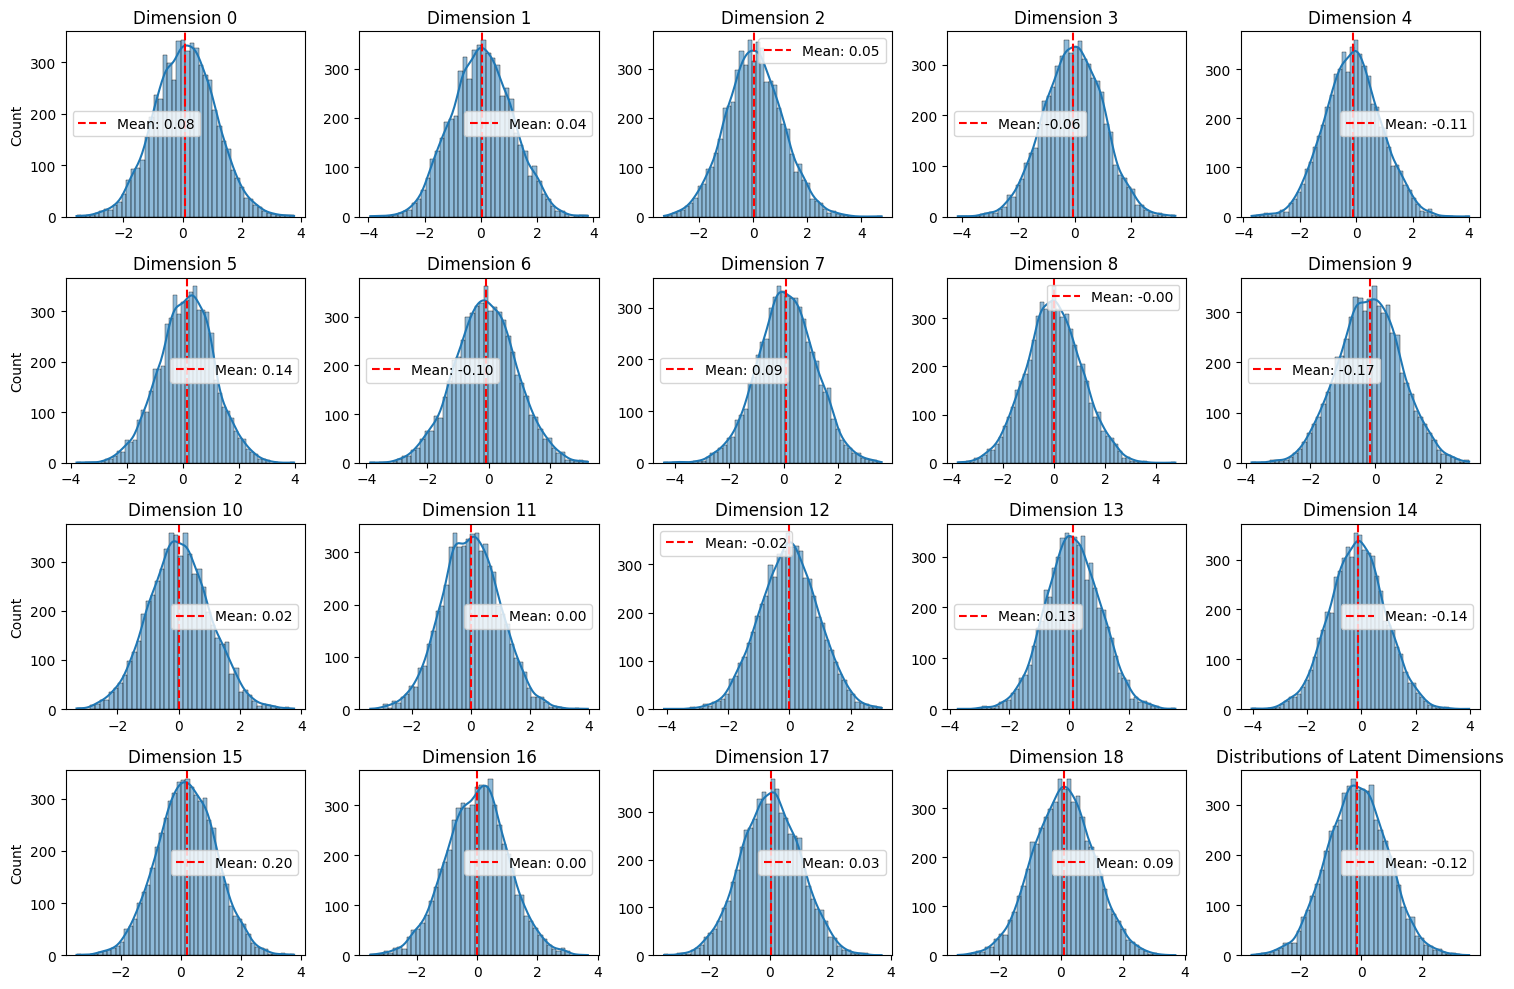

In [11]:
# Plot distributions of latent dimensions
print("Plotting latent dimension distributions...")
dims_path = os.path.join(output_dir, 'latent_dimensions.png')
dims_fig = plot_latent_dimensions(
    latent_embeddings=compare_latent['original'],
    n_dims=min(20, tvae.embedding_dim),  # Plot at most 20 dimensions
    save_path=dims_path
)

# Display the dimensions figure
plt.figure(dims_fig.number)
plt.title('Distributions of Latent Dimensions')
plt.tight_layout()
plt.show()

## Conclusion

These visualizations and analyses help us understand the structure of the TVAE's latent space and how well it captures the original data distribution.